In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
import seaborn as sns

In [2]:
# Importing the dataset
X_train_raw = pd.read_csv('D:/Downloads/Competition/classification_comp_starter_kit/Header - train.txt')
X_test_raw = pd.read_csv('D:/Downloads/Competition/classification_comp_starter_kit/Header - test.txt')
y_train_raw = pd.read_csv('D:/Downloads/Competition/classification_comp_starter_kit/Well_class_train.txt')
X_validate_raw = pd.read_csv('D:/Downloads/Competition/classification_comp_starter_kit/Header - validation.txt')
y_validate_raw = pd.read_csv('D:/Downloads/Competition/classification_comp_starter_kit/Well_class_validate.txt')

In [3]:
print('The rows and columns of independent variable is ', X_train_raw.shape)
print('the raw and coulmn of the dependent variable is ' , y_train_raw.shape)
print('the raw and coulmn of the dependent variable is ' , X_test_raw.shape)

The rows and columns of independent variable is  (588673, 90)
the raw and coulmn of the dependent variable is  (588673, 3)
the raw and coulmn of the dependent variable is  (118076, 90)


In [4]:
Z=pd.merge(X_train_raw, y_train_raw , on='EPAssetsId' ,how='inner')
ZV=pd.merge(X_validate_raw, y_validate_raw , on='EPAssetsId' ,how='inner')
ZVV= X_test_raw

In [5]:
Z=Z.drop_duplicates(keep='first')
Z_Sort= Z.sort_values(by="TVD",ascending=False)

In [ ]:
DF=Z[['EPAssetsId','LicenceNumber','LicenceDate','UWI','CurrentOperator','CurrentOperatorParent', 'CurrentOperatorID', 'SpudDate', 'ConfidentialReleaseDate','Confidential', 'SurfAbandonDate', 'RigReleaseDate','RegulatoryAgency','StatusDate','well_status_code' ]]

In [8]:
Z['ConfidentialRelease']=np.where(Z.ConfidentialReleaseDate.isnull(),0,1)
ZV['ConfidentialRelease']=np.where(ZV.ConfidentialReleaseDate.isnull(),0,1)
ZVV['ConfidentialRelease']=np.where(ZVV.ConfidentialReleaseDate.isnull(),0,1)
Z['Spud']=np.where(Z.SpudDate.isnull(),0,1)
ZV['Spud']=np.where(ZV.SpudDate.isnull(),0,1)
ZVV['Spud']=np.where(ZVV.SpudDate.isnull(),0,1)


Z['SurfAbandon']=np.where(Z.SurfAbandonDate.isnull(),0,1)
ZV['SurfAbandon']=np.where(ZV.SurfAbandonDate.isnull(),0,1)
ZVV['SurfAbandon']=np.where(ZVV.SurfAbandonDate.isnull(),0,1)

Z['RigRelease']=np.where(Z.RigReleaseDate.isnull(),0,1)
ZV['RigRelease']=np.where(ZV.RigReleaseDate.isnull(),0,1)
ZVV['RigRelease']=np.where(ZVV.RigReleaseDate.isnull(),0,1)

In [9]:
Z.LaheeClass.replace(['Confidential', 'Development Service Well','Non Issued Licence'],'Development',inplace=True)
Z.LaheeClass.replace(['Deeper Pool Test', 'Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Test Hole'],'Test',inplace=True)
Z.LaheeClass.replace(['New Pool Wildcat', 'New Field Wildcat','Deeper Pool Wildcat'],'WildCat',inplace=True)

ZV.LaheeClass.replace(['Confidential', 'Development Service Well','Non Issued Licence'],'Development',inplace=True)
ZV.LaheeClass.replace(['Deeper Pool Test', 'Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Test Hole'],'Test',inplace=True)
ZV.LaheeClass.replace(['New Pool Wildcat', 'New Field Wildcat','Deeper Pool Wildcat'],'WildCat',inplace=True)


ZVV.LaheeClass.replace(['Confidential', 'Development Service Well','Non Issued Licence'],'Development',inplace=True)
ZVV.LaheeClass.replace(['Deeper Pool Test', 'Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Test Hole'],'Test',inplace=True)
ZVV.LaheeClass.replace(['New Pool Wildcat', 'New Field Wildcat','Deeper Pool Wildcat'],'WildCat',inplace=True)

In [10]:
Z.WellTypeStandardised.replace(['Commingled Disposal - Water','Commingled Bitumen','Commingled Observation','Commingled - Water','Commingled - Oil','Commingled Gas', 'Commingled - Gas','Commingled Oil','Commingled Coalbed Methane'],'Commingled',inplace=True)
Z.WellTypeStandardised.replace(['Injetcion - Polymer','Injection - Polymer','Injection - Salt Water ','Injection - Water','Injection - CO2','Injection - Oxygen','Injection - Air (Combustion)','Injection - Water Alternating Gas','Injection - Solvent','Injection - Gas','Injection - Unspecified','Disposal - Salt Water','Injection - Polymer ','Injection - Steam','Injection - Nitrogen'],'Injection',inplace=True)
Z.WellTypeStandardised.replace(['Confidential',"Storage - Gas","Disposal - Brine" ,"Commingled Disposal - Water"  ,"Crude Oil Observation" ,'Test',"Training"  ,"Disposal - Gas"  , "Domestic Water",  "Injection - Salt Water"  , "Commingled Injection - Water"  ,"Oil & Gas" ,'Storage - LPG',"Evaluation","Salt Water","Disposal - Acid Gas" , "Industrial Waste" , "Water Source"  ,'Farm Gas', 'Stratigraphic Test', "Disposal - Waste", 'Potash','Other' , 'Farm Water', 'Experimental' ,'Source Water', 'Disposal - Unspecified','Storage - Gas''Confidential','Oil - Cyclical','Development Service Well'],'Other',inplace=True)
ZV.WellTypeStandardised.replace(['Commingled Disposal - Water','Commingled Bitumen','Commingled Observation','Commingled - Water','Commingled - Oil','Commingled Gas', 'Commingled - Gas','Commingled Oil','Commingled Coalbed Methane'],'Commingled',inplace=True)
ZV.WellTypeStandardised.replace(['Injetcion - Polymer','Injection - Polymer','Injection - Salt Water ','Injection - Water','Injection - CO2','Injection - Oxygen','Injection - Air (Combustion)','Injection - Water Alternating Gas','Injection - Solvent','Injection - Gas','Injection - Unspecified','Disposal - Salt Water','Injection - Polymer ','Injection - Steam','Injection - Nitrogen'],'Injection',inplace=True)
ZV.WellTypeStandardised.replace(['Confidential',"Storage - Gas","Disposal - Brine" ,"Commingled Disposal - Water"  ,"Crude Oil Observation" ,'Test',"Training"  ,"Disposal - Gas"  , "Domestic Water",  "Injection - Salt Water"  , "Commingled Injection - Water"  ,"Oil & Gas" ,'Storage - LPG',"Evaluation","Salt Water","Disposal - Acid Gas" , "Industrial Waste" , "Water Source"  ,'Farm Gas', 'Stratigraphic Test', "Disposal - Waste", 'Potash','Other' , 'Farm Water', 'Experimental' ,'Source Water', 'Disposal - Unspecified','Storage - Gas''Confidential','Oil - Cyclical','Development Service Well'],'Other',inplace=True)
ZVV.WellTypeStandardised.replace(['Commingled Disposal - Water','Commingled Bitumen','Commingled Observation','Commingled - Water','Commingled - Oil','Commingled Gas', 'Commingled - Gas','Commingled Oil','Commingled Coalbed Methane'],'Commingled',inplace=True)
ZVV.WellTypeStandardised.replace(['Injection - Water Alt','Injetcion - Polymer','Injection - Polymer','Injection - Salt Water ','Injection - Water','Injection - CO2','Injection - Oxygen','Injection - Air (Combustion)','Injection - Water Alternating Gas','Injection - Solvent','Injection - Gas','Injection - Unspecified','Disposal - Salt Water','Injection - Polymer ','Injection - Steam','Injection - Nitrogen'],'Injection',inplace=True)
ZVV.WellTypeStandardised.replace(['Confidential',"Storage - Gas","Disposal - Brine" ,"Commingled Disposal - Water"  ,"Crude Oil Observation" ,'Test',"Training"  ,"Disposal - Gas"  , "Domestic Water",  "Injection - Salt Water"  , "Commingled Injection - Water"  ,"Oil & Gas" ,'Storage - LPG',"Evaluation","Salt Water","Disposal - Acid Gas" , "Industrial Waste" , "Water Source"  ,'Farm Gas', 'Stratigraphic Test', "Disposal - Waste", 'Potash','Other' , 'Farm Water', 'Experimental' ,'Source Water', 'Disposal - Unspecified','Storage - Gas''Confidential','Oil - Cyclical','Development Service Well'],'Other',inplace=True)
ZVV.BH_Unit.replace(np.nan,'Not Applicable',inplace=True)

In [11]:
Z['_Fracture`Stages']=Z['_Fracture`Stages'].fillna(0)
ZV['_Fracture`Stages']=ZV['_Fracture`Stages'].fillna(0)
ZVV['_Fracture`Stages']=ZVV['_Fracture`Stages'].fillna(0)

In [12]:
#cleaning outliers 
I=Z[Z['SurfAbandon']==1]
Z.drop( I[I.well_status_code==1].index, inplace=True)

In [13]:
Z.drop( I[I.well_status_code==2].index, inplace=True)
Z.groupby('SurfAbandon', as_index=True)['well_status_code'].value_counts()

SurfAbandon  well_status_code
0            1                   233711
             2                   105461
             0                   100353
1            0                   147774
Name: well_status_code, dtype: int64

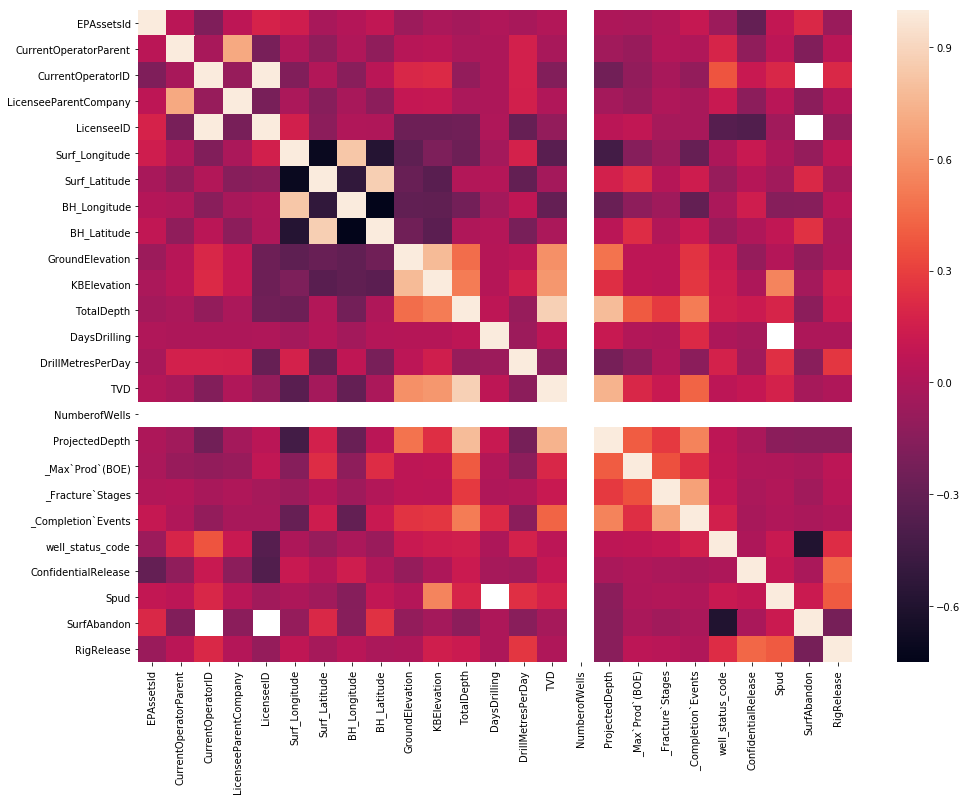

In [14]:
import seaborn as sns
corr =Z.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


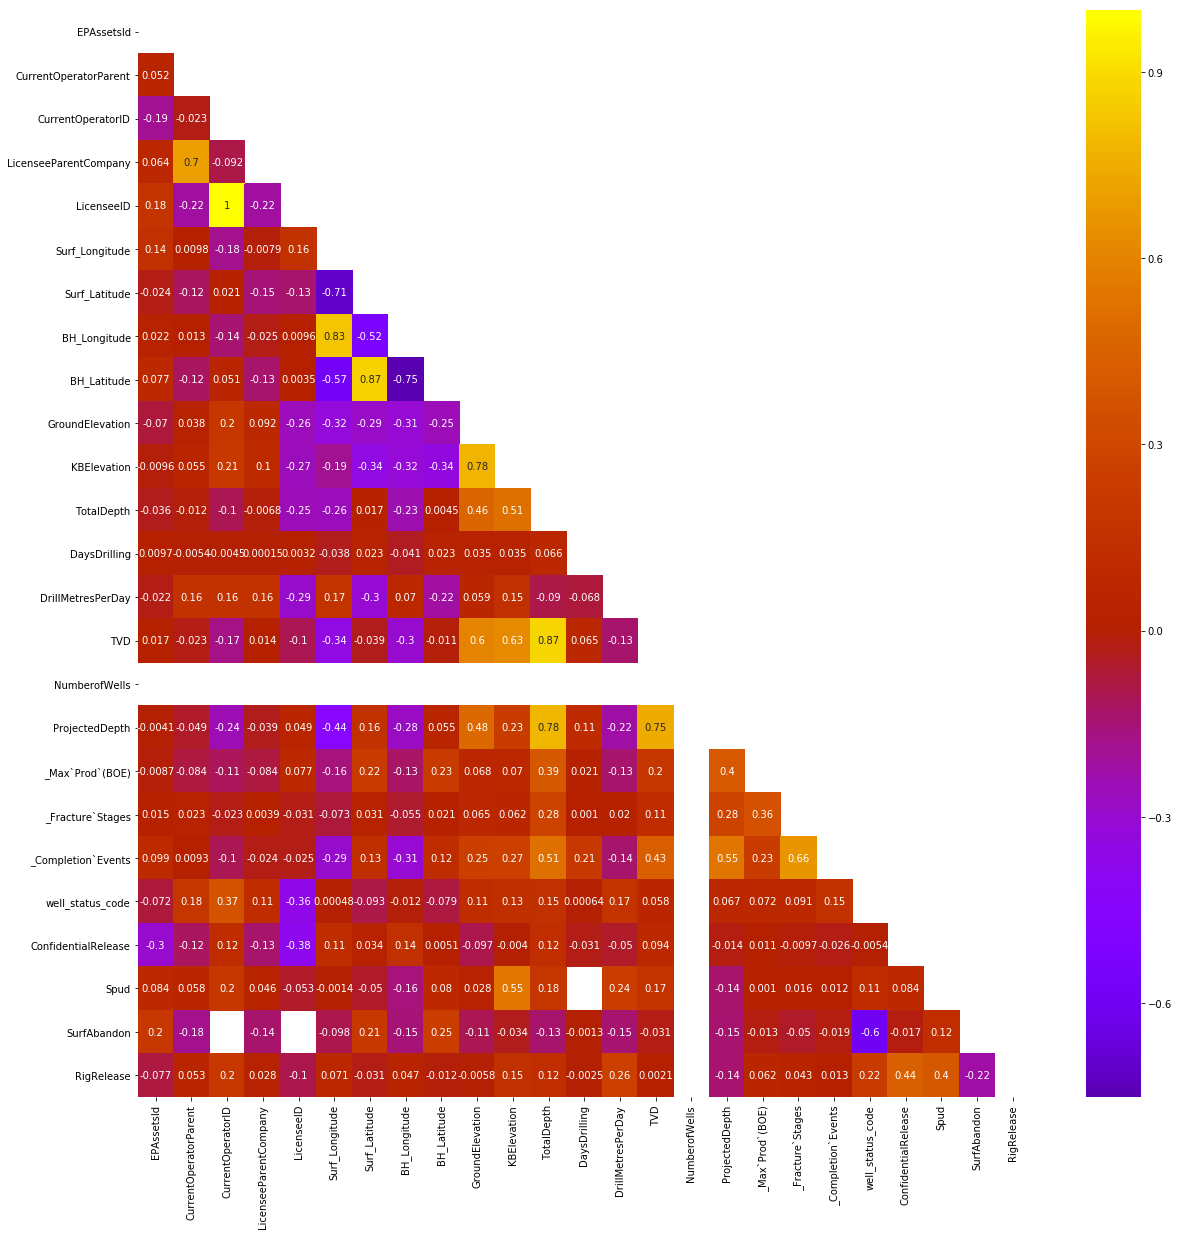

In [15]:
corr = Z.corr()
# we can create a mask to not show duplicate values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# generate heatmap
plt.figure(figsize= (20,20))
sns.heatmap(corr, annot=True, center=0, mask=mask, cmap='gnuplot')
plt.show()

In [16]:
ZVV['TotalDepth']=ZVV['TotalDepth'].fillna(0)
Z['TotalDepth']=Z['TotalDepth'].fillna(0)
ZV['TotalDepth']=ZV['TotalDepth'].fillna(0)
ZVV['TVD']=ZVV['TVD'].fillna(1)
Z['TVD']=Z['TVD'].fillna(1)
ZV['TVD']=ZV['TVD'].fillna(1)
ZVV['TVD']=ZVV['TVD'].replace(0,1)
Z['TVD']=Z['TVD'].replace(0,1)
ZV['TVD']=ZV['TVD'].replace(0,1)


In [17]:
Z['MD/TVD']=Z['TotalDepth']/Z['TVD']
ZV['MD/TVD']=ZV['TotalDepth']/ZV['TVD']
ZVV['MD/TVD']=ZVV['TotalDepth']/ZVV['TVD']

In [18]:
Z['MD/TVD']=Z['MD/TVD'].fillna(0)
ZV['MD/TVD']=ZV['MD/TVD'].fillna(0)
ZVV['MD/TVD']=ZVV['MD/TVD'].fillna(0)

# Data Cleaning

In [19]:
#X_Select = ['EPAssetsId', , 'TotalDepth' , 'LaheeClass' , "TVD", "WellProfile" , '_Open`Hole']
##'RigRelease'  adversely affect the model 
#,'_Open`Hole' not effective,'BH_Unit'

X_Select = ['EPAssetsId','CurrentOperatorParent', 'SurfAbandon' ,'Spud', 'MD/TVD',"WellProfile",'_Fracture`Stages', 
            'Province','ConfidentialRelease','Confidential','LaheeClass','WellTypeStandardised' ]
X_train = Z[X_Select ]
X_validate = ZV[X_Select ]
y_select=['EPAssetsId', 'well_status_code']
y_validate =ZV[y_select]
y_train=Z[y_select]
X_test= ZVV[X_Select ]

In [20]:

#Z.groupby(["well_status_code"])['BH_Latitude'].value_counts()

# One Hot Encoding

In [21]:
#One hot encoding - the code dropped the original column!
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 
X_train=encode_and_bind(X_train, "WellProfile")
X_train=encode_and_bind(X_train, "Province")
X_train=encode_and_bind(X_train, "LaheeClass")
X_train=encode_and_bind(X_train, "Confidential")
#X_train=encode_and_bind(X_train, '_Open`Hole')
X_train=encode_and_bind(X_train, 'WellTypeStandardised')
#X_train=encode_and_bind(X_train, 'BH_Unit')
#X_train=encode_and_bind(X_train, 'PSACAreaName')
X_validate=encode_and_bind(X_validate, "WellProfile")
X_validate=encode_and_bind(X_validate, "Province")
X_validate=encode_and_bind(X_validate, "LaheeClass")
X_validate=encode_and_bind(X_validate, "Confidential")

#X_validate=encode_and_bind(X_validate, '_Open`Hole')
X_validate=encode_and_bind(X_validate, 'WellTypeStandardised')
#X_validate=encode_and_bind(X_validate, 'BH_Unit')
#X_validate=encode_and_bind(X_validate, 'PSACAreaName')
X_test=encode_and_bind(X_test, "WellProfile")
X_test=encode_and_bind(X_test, "Province")
X_test=encode_and_bind(X_test, "LaheeClass")
X_test=encode_and_bind(X_test, "Confidential")

#X_test=encode_and_bind(X_test, '_Open`Hole')
X_test=encode_and_bind(X_test, 'WellTypeStandardised')
#X_test=encode_and_bind(X_test, 'BH_Unit')
#X_train=encode_and_bind(X_test, 'PSACAreaName')

In [22]:
X_train=X_train.set_index('EPAssetsId')
X_validate=X_validate.set_index('EPAssetsId')
X_test=X_test.set_index('EPAssetsId')
y_train=y_train.set_index('EPAssetsId')
y_validate=y_validate.set_index('EPAssetsId')


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validate = sc.transform(X_validate)
X_test = sc.transform(X_test)

# Random Forest

In [24]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3),params))

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier() #n_estimators= 10, criterion= 'entropy', random_state=0
parameters = {
    'n_estimators': [5, 50 , 250],
    'max_depth': [2,4,8,16,32,None]
}
classifier = GridSearchCV(RF, parameters, cv=5)
classifier.fit(X_train, y_train.values.ravel())
print_results(classifier) '''

In [26]:
y_pred_validate_RF = classifier.predict(X_validate)
y_pred_train_RF = classifier.predict(X_train)
y_pred_test_RF = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train_RF)
confusion_matrix

array([[231125,   5212,  11790],
       [  4244, 215476,  13991],
       [  5988,  29100,  70373]], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred_validate_RF)
confusion_matrix

array([[54462,  1409,  3360],
       [ 1340, 43090,  5581],
       [ 2273,  9028, 11588]], dtype=int64)

In [29]:
classifier.score(X_train,y_train)

0.8802569049155541

In [30]:
classifier.score(X_validate,y_validate)

0.8259984409411871

In [31]:
from sklearn.metrics import  f1_score
f1_score(y_validate, y_pred_validate_RF,average='micro')

0.8259984409411871

In [32]:
Submitfile1=X_test_raw[['EPAssetsId']]
Submitfile1['well_status_code']=y_pred_test_RF
Submitfile1.to_csv('D:/Submit-classification_RF.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
# Get numerical feature importances
importances = list(classifier.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_Select, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: EPAssetsId           Importance: 0.32
Variable: CurrentOperatorParent Importance: 0.19
Variable: Spud                 Importance: 0.16
Variable: _Fracture`Stages     Importance: 0.02
Variable: SurfAbandon          Importance: 0.01
Variable: MD/TVD               Importance: 0.01
Variable: WellProfile          Importance: 0.01
Variable: Confidential         Importance: 0.01
Variable: LaheeClass           Importance: 0.01
Variable: Province             Importance: 0.0
Variable: ConfidentialRelease  Importance: 0.0
Variable: WellTypeStandardised Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None]

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
y_pred_validate_LR = classifier.predict(X_validate)
y_pred_train_LR = classifier.predict(X_train)
y_pred_test_LR = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train_LR)
confusion_matrix

array([[210843,  27970,   9314],
       [ 15392, 207032,  11287],
       [ 24813,  61214,  19434]], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred_validate_LR)
confusion_matrix

array([[50608,  6314,  2309],
       [ 3387, 44221,  2403],
       [ 5608, 13097,  4184]], dtype=int64)

In [38]:
classifier.score(X_train,y_train)

0.7446104965273226

In [39]:
classifier.score(X_validate,y_validate)

0.7493548069718688

In [40]:
from sklearn.metrics import  f1_score
f1_score(y_validate, y_pred_validate_LR,average='micro')

0.7493548069718688

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [42]:
y_pred_validate_DT = classifier.predict(X_validate)
y_pred_train_DT = classifier.predict(X_train)
y_pred_test_DT = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train_DT)
confusion_matrix

array([[232194,   4750,  11183],
       [  4477, 216802,  12432],
       [  6066,  28196,  71199]], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred_validate_DT)
confusion_matrix

array([[54493,  1411,  3327],
       [ 1426, 42824,  5761],
       [ 2391,  8945, 11553]], dtype=int64)

In [45]:
classifier.score(X_train,y_train)

0.8857413344820951

In [46]:
classifier.score(X_validate,y_validate)

0.8239550143418274

In [47]:
from sklearn.metrics import  f1_score
f1_score(y_validate, y_pred_validate_DT,average='micro')

0.8239550143418274

In [48]:
Submitfile1=X_test_raw[['EPAssetsId']]


Submitfile1['well_status_code']=y_pred_test_DT



Submitfile1.to_csv('D:/Submit-classification_DT.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [50]:
y_pred_validate_NB = classifier.predict(X_validate)
y_pred_train_NB = classifier.predict(X_train)
y_pred_test_NB = classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train_NB)
confusion_matrix

array([[165519,  11378,  71230],
       [  4130,  76183, 153398],
       [  1354,   6185,  97922]], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred_validate_NB)
confusion_matrix

array([[39798,  2620, 16813],
       [  984, 16301, 32726],
       [  507,  1398, 20984]], dtype=int64)

In [53]:
classifier.score(X_train,y_train)

0.5782812502660485

In [54]:
classifier.score(X_validate,y_validate)

0.5833831576238733

In [55]:
from sklearn.metrics import  f1_score
f1_score(y_validate, y_pred_validate_NB,average='micro')

0.5833831576238733

# Gradient Boosting


# Multilayer Perceptron

# Light GBM

In [60]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [61]:
predicted_y = model.predict(X_validate)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [62]:
model.score(X_validate,y_validate)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8255065049080079

In [63]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X_validate, y_validate, cv=5)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

In [64]:
from sklearn.model_selection import cross_val_score
y_pred_score = cross_val_score(model, X_validate, y_validate, cv=5)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

In [65]:
from sklearn.metrics import  f1_score
f1_score(y_validate, y_pred,average='micro')

0.8238036494085416

In [66]:
y_pred_test_LGB=model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [67]:
Submitfile1=X_test_raw[['EPAssetsId']]


Submitfile1['well_status_code']=y_pred_test_LGB



Submitfile1.to_csv('D:/Submit-classification_LGB.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [68]:
y_pred_score

array([0.82246103, 0.82835087, 0.82388557, 0.82384773, 0.82047304])